In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
x = np.linspace(0,0.3,1000)

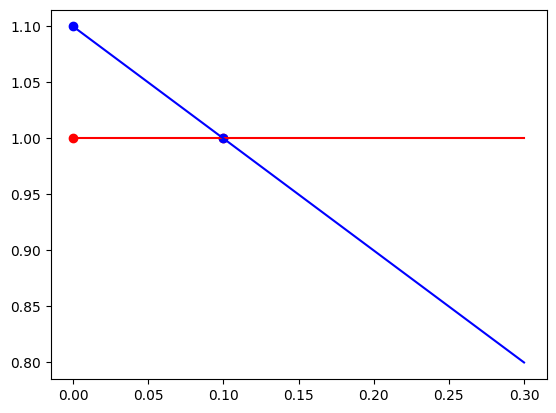

In [15]:
w1 = (1,0)
w2 = (1.1, -1)
y1 = w1[0]*1 + w1[1]*x
y2 = w2[0]*1 + w2[1]*x
plt.plot(x,y1,color = "red")
plt.plot(x,y2,color = "blue")

plt.scatter(0,1,color = "red")
plt.scatter(0.1,1,color = "red")

plt.scatter(0,1.1,color = "blue")
plt.scatter(0.1,1,color = "blue")


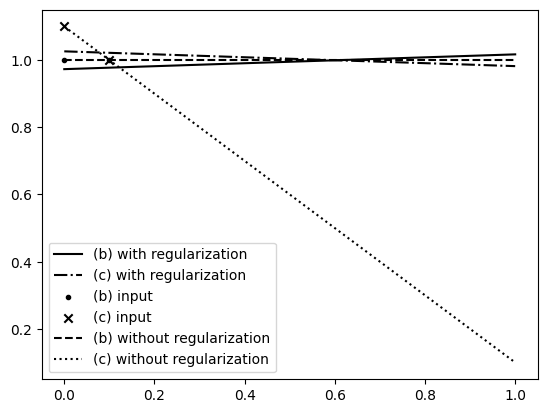

In [33]:


x = np.linspace(0,1,1000)
w1 = (0.973,0.044)
w2 = (1.026,-0.044)
y1 = w1[0]*1 + w1[1]*x
y2 = w2[0]*1 + w2[1]*x
plt.plot(x,y1,label = "(b) with regularization",color = "black")
plt.plot(x,y2,label = "(c) with regularization",ls = "-.",color = "black")

plt.scatter(0,1,color = "black", marker = ".",label = "(b) input")
plt.scatter(0.1,1,color = "black", marker = ".")

plt.scatter(0,1.1,color = "black", marker = "x",label = "(c) input")
plt.scatter(0.1,1,color = "black", marker = "x")

w1 = (1,0)
w2 = (1.1, -1)
y1 = w1[0]*1 + w1[1]*x
y2 = w2[0]*1 + w2[1]*x
plt.plot(x,y1,color = "black",ls = "--",label = "(b) without regularization")
plt.plot(x,y2,color = "black",ls = ":",label = "(c) without regularization")
plt.legend()

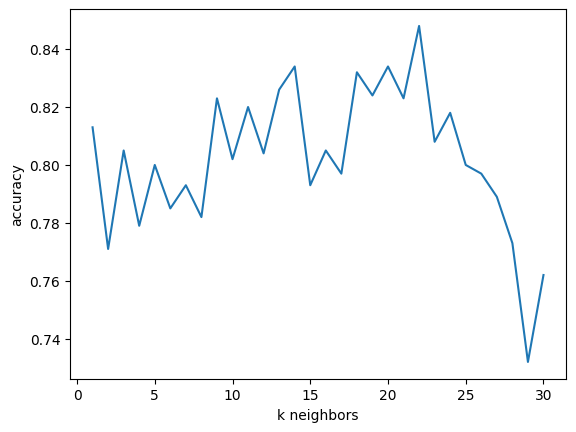

best # of neighbors k: 22
best cross validation accuracy: 0.8480000000000001
test accuracy: 0.618


In [86]:
import numpy as np
import matplotlib.pyplot as plt


def load_knn_data():
    test_inputs = np.genfromtxt('knn-dataset/test_inputs.csv', delimiter=','),
    test_labels = np.genfromtxt('knn-dataset/test_labels.csv', delimiter=','),
    train_inputs = np.genfromtxt('knn-dataset/train_inputs.csv', delimiter=','),
    train_labels = np.genfromtxt('knn-dataset/train_labels.csv', delimiter=','),
    return train_inputs, train_labels, test_inputs, test_labels


'''
This function implements the KNN classifier to predict the label of a data point. 
Measure distances with the Euclidean norm (L2 norm).  
When there is a tie between two (or more) labels, break the tie by choosing any label.

Inputs:
    **x**: input data point for which we want to predict the label (numpy array of M features)
    **inputs**: matrix of data points in which neighbors will be found (numpy array of N data points x M features)
    **labels**: vector of labels associated with the data points  (numpy array of N labels)
    **k_neighbors**: # of nearest neighbors that will be used
Outputs:
    **predicted_label**: predicted label (integer)
'''   
def predict_knn(x, inputs, labels, k_neighbors):
    predicted_label = 0
    ########
    # TO DO:

    N = inputs.shape[0]
    dist_arr = np.zeros((N,))
    for i in range(0,N):
        dist_arr[i] = np.sum((x - inputs[i]) ** 2)

    # sorted_dist_arr = sorted(dist_arr,reverse=False)
    sorted_idx = sorted(list(range(len(dist_arr))),key = lambda k:dist_arr[k],reverse=False)
   
    negihbors = sorted_idx[0:k_neighbors]
    label_of_neighbor = [labels[k] for k in negihbors]
    unique,cnt = np.unique(label_of_neighbor,return_counts=True)
    predicted_label = unique[np.argmax(cnt)]
   
    ########
    return predicted_label


'''
This function evaluates the accuracy of the KNN classifier on a dataset. 
The dataset to be evaluated consists of (inputs, labels). 
The dataset used to find nearest neighbors consists of (train_inputs, train_labels).

Inputs:
   **inputs**: matrix of input data points to be evaluated (numpy array of N data points x M features)
   **labels**: vector of target labels for the inputs (numpy array of N labels)
   **train_inputs**: matrix of input data points in which neighbors will be found (numpy array of N' data points x M features)
   **train_labels**: vector of labels for the training inputs (numpy array of N' labels)
   **k_neighbors**: # of nearest neighbors to be used (integer)
Outputs:
   **accuracy**: percentage of correctly labeled data points (float)
'''
def eval_knn(inputs, labels, train_inputs, train_labels, k_neighbors):
    accuracy = 0
    ########
    # TO DO:
    
    N = train_inputs.shape[0]
    num_correct = 0
    for i in range(N):
        x = train_inputs[i]
        x_label = train_labels[i]

        x_label_predicted = predict_knn(x,inputs,labels,k_neighbors)
        if x_label_predicted == x_label:
            num_correct+=1
    
    accuracy = num_correct/N
    ########
    return accuracy


'''
This function performs k-fold cross validation to determine the best number of neighbors for KNN.
        
Inputs:
    **k_folds**: # of folds in cross-validation (integer)
    **hyperparameters**: list of hyperparameters where each hyperparameter is a different # of neighbors (list of integers)
    **inputs**: matrix of data points to be used when searching for neighbors (numpy array of N data points by M features)
    **labels**: vector of labels associated with the inputs (numpy array of N labels)
Outputs:
    **best_hyperparam**: best # of neighbors for KNN (integer)
    **best_accuracy**: accuracy achieved with best_hyperparam (float)
    **accuracies**: vector of accuracies for the corresponding hyperparameters (numpy array of floats)
'''
def cross_validation_knn(k_folds, hyperparameters, inputs, labels):
    best_hyperparam = 0
    best_accuracy = 0
    accuracies = np.zeros(len(hyperparameters))
    ########
    # TO DO:
    inputs = inputs[0]
    labels = labels[0]
    N,_ = inputs.shape
    for j in range(len(hyperparameters)):
        tmp_acc = np.zeros(N//k_folds)
        for i in range(N//k_folds):
            valid_sets = inputs[i:i + k_folds]
            valid_label_sets = labels[i:i+k_folds]
            input_sets = np.concatenate((inputs[:i],inputs[i+k_folds:]),axis = 0)
            input_label_sets = np.concatenate((labels[:i],labels[i+k_folds:]),axis = 0)
            tmp_acc[i] = eval_knn(input_sets,input_label_sets,valid_sets,valid_label_sets,hyperparameters[j])
        accuracies[j] = np.mean(tmp_acc)
    idx = np.argmax(accuracies)
    best_accuracy = accuracies[idx]
    best_hyperparam = hyperparameters[idx]
    ########
    return best_hyperparam, best_accuracy, accuracies


'''
This function plots the KNN accuracies for different # of neighbors (hyperparameters) based on cross validation

Inputs:
    **accuracies**: vector of accuracies for the corresponding hyperparameters (numpy array of floats)
    **hyperparams**: list of hyperparameters where each hyperparameter is a different # of neighbors (list of integers)
'''
def plot_knn_accuracies(accuracies, hyperparams):
    plt.plot(hyperparams, accuracies)
    plt.ylabel('accuracy')
    plt.xlabel('k neighbors')
    plt.show()


def main():
    # load data
    train_inputs, train_labels, test_inputs, test_labels = load_knn_data()
    # print(train_inputs)
    # predict_knn(test_inputs[0][0],train_inputs[0],train_labels[0],10)
    # eval_knn(test_inputs[0],test_labels[0],train_inputs[0],train_labels[0],1)

    # number of neighbors to be evaluated by cross validation
    hyperparams = range(1,31)
    k_folds = 10

    # use k-fold cross validation to find the best # of neighbors for KNN
    best_k_neighbors, best_accuracy, accuracies = cross_validation_knn(k_folds, hyperparams, train_inputs, train_labels)

    # plot results
    plot_knn_accuracies(accuracies, hyperparams)
    print('best # of neighbors k: ' + str(best_k_neighbors))
    print('best cross validation accuracy: ' + str(best_accuracy))

    # evaluate with best # of neighbors
    accuracy = eval_knn(test_inputs[0], test_labels[0], train_inputs[0], train_labels[0], best_k_neighbors)
    print('test accuracy: '+ str(accuracy))


if __name__ == "__main__":
    main()

In [77]:
train_inputs, train_labels, test_inputs, test_labels = load_knn_data()
train_inputs[0]

array([[ 0.,  0., 10., ...,  7.,  2.,  2.],
       [ 0.,  0.,  9., ...,  4.,  0., 14.],
       [10., 15., 16., ..., 14., 16.,  1.],
       ...,
       [ 5.,  2.,  0., ...,  1.,  4.,  4.],
       [ 0.,  0.,  5., ...,  0.,  4.,  2.],
       [ 0.,  0.,  2., ...,  0.,  2.,  0.]])

In [80]:
tmp_input = train_inputs[0]
tmp_input.shape

(1000, 64)

In [79]:
tmp_input[1].shape

(64,)

In [58]:
k = 10
N,_ = tmp_input.shape
for i in range(N//k):
    print(i)
    val_set = tmp_input[i:i+k]
    input_sets = np.concatenate((tmp_input[:i],tmp_input[i+k:]),axis = 0)
    print(val_set)
    print(input_sets)


0
[[ 0.  0. 10.  0. 14.  2.  0.  0.  4.  2.  5.  9.  4.  0.  0.  0.  0.  1.
   7.  6.  0.  2.  0.  2.  2.  0. 14.  0.  0.  2.  0.  0.  2.  2. 15. 11.
  12. 12.  0.  1.  0.  0.  1.  6.  0.  1.  0.  0.  0.  0. 11.  3.  2.  1.
   0.  0.  0.  2.  2.  0.  3.  7.  2.  2.]
 [ 0.  0.  9. 16. 16. 16.  0.  1.  0.  0.  9.  2.  6. 11.  9.  0.  5. 13.
   2.  1.  6.  0.  1.  2.  3.  9.  6.  8.  3.  3. 10.  2.  0. 16. 16.  6.
  12.  0. 12.  0.  3.  4.  0.  1.  3.  0.  0.  1.  2.  2.  0.  8.  9. 14.
   4.  0.  4.  0. 14. 13.  9.  4.  0. 14.]
 [10. 15. 16. 10. 16. 16.  0.  1. 16. 12.  7. 16. 16. 16.  7. 10.  7.  5.
  14. 15. 16. 15.  6.  3.  1.  0. 16. 16.  7.  4.  1.  0. 14.  5. 12. 16.
  15. 16.  7.  6.  3.  5. 14. 16. 16. 15. 15.  7.  5.  0.  5. 16. 16. 14.
  16. 16.  1. 16. 16.  7. 14. 14. 16.  1.]
 [ 1.  2.  0.  6.  0.  2.  1.  0.  0.  0.  5.  4.  0.  1.  1.  0.  2.  2.
   0.  0.  0.  2.  2.  2.  0.  0.  1.  4.  0.  4.  1.  0.  0.  0.  0.  0.
   5.  1.  5.  1.  0.  0.  0.  0.  0. 12.  1.  0.  0.  